### Importing Data


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

adidas = pd.read_csv('/content/drive/MyDrive/Adidas_US_Sales_Datasets.csv')

In [4]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


In [5]:
adidas.head(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


### Data Cleaning

In [6]:
# Data Formatting

adidas['Price per Unit'] = adidas['Price per Unit'].str.replace('[%$,]', '').astype('float') # Change to float type
adidas['Units Sold'] = adidas['Units Sold'].str.replace('[%$,]', '').astype('float')
adidas['Total Sales'] = adidas['Total Sales'].str.replace('[%$,]', '').astype('float')
adidas['Operating Profit'] = adidas['Operating Profit'].str.replace('[%$,]', '').astype('float')
adidas['Operating Margin'] = adidas['Operating Margin'].str.replace('[%$,]', '').astype('float')

<ipython-input-6-0ee0f52c994b>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  adidas['Price per Unit'] = adidas['Price per Unit'].str.replace('[%$,]', '').astype('float') # Change to float type
<ipython-input-6-0ee0f52c994b>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  adidas['Units Sold'] = adidas['Units Sold'].str.replace('[%$,]', '').astype('float')
<ipython-input-6-0ee0f52c994b>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  adidas['Total Sales'] = adidas['Total Sales'].str.replace('[%$,]', '').astype('float')
<ipython-input-6-0ee0f52c994b>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  adidas['Operating Profit'] = adidas['Operating Profit'].str.replace('[%$,]', '').astype('float')
<ipython-input-6-0ee0f52c994b>:7: FutureWarning: The default value of regex will change from Tr

In [7]:
adidas.head(3)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store


In [8]:
# Operating Margin

adidas['Operating_Margin_rate'] = adidas['Operating Margin']*0.01
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Operating_Margin_rate
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store,0.50
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store,0.30
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store,0.35
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35.0,In-store,0.35
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30.0,In-store,0.30


### Change Time Frame using Pandas

In [9]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Operating_Margin_rate
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store,0.50
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store,0.30
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store,0.35
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35.0,In-store,0.35
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30.0,In-store,0.30


In [10]:
adidas['Invoice Date'] = pd.to_datetime(adidas['Invoice Date'], format='%Y-%m-%d' )

In [11]:
adidas['year'] =adidas['Invoice Date'].dt.year
adidas['month'] =adidas['Invoice Date'].dt.month

In [12]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Retailer               9648 non-null   object        
 1   Retailer ID            9648 non-null   int64         
 2   Invoice Date           9648 non-null   datetime64[ns]
 3   Region                 9648 non-null   object        
 4   State                  9648 non-null   object        
 5   City                   9648 non-null   object        
 6   Product                9648 non-null   object        
 7   Price per Unit         9648 non-null   float64       
 8   Units Sold             9648 non-null   float64       
 9   Total Sales            9648 non-null   float64       
 10  Operating Profit       9648 non-null   float64       
 11  Operating Margin       9648 non-null   float64       
 12  Sales Method           9648 non-null   object        
 13  Ope

In [13]:
adidas['Retailer ID'] = adidas['Retailer ID'].astype('string')

In [14]:
adidas['Retailer ID'].astype('int32')

0       1185732
1       1185732
2       1185732
3       1185732
4       1185732
         ...   
9643    1185732
9644    1185732
9645    1185732
9646    1185732
9647    1185732
Name: Retailer ID, Length: 9648, dtype: int32

### Null Value Check

In [15]:
adidas.isnull().sum()

# True = 1, False = 0

Retailer                 0
Retailer ID              0
Invoice Date             0
Region                   0
State                    0
City                     0
Product                  0
Price per Unit           0
Units Sold               0
Total Sales              0
Operating Profit         0
Operating Margin         0
Sales Method             0
Operating_Margin_rate    0
year                     0
month                    0
dtype: int64

In [16]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Retailer               9648 non-null   object        
 1   Retailer ID            9648 non-null   string        
 2   Invoice Date           9648 non-null   datetime64[ns]
 3   Region                 9648 non-null   object        
 4   State                  9648 non-null   object        
 5   City                   9648 non-null   object        
 6   Product                9648 non-null   object        
 7   Price per Unit         9648 non-null   float64       
 8   Units Sold             9648 non-null   float64       
 9   Total Sales            9648 non-null   float64       
 10  Operating Profit       9648 non-null   float64       
 11  Operating Margin       9648 non-null   float64       
 12  Sales Method           9648 non-null   object        
 13  Ope

In [17]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Operating_Margin_rate,year,month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store,0.50,2020,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store,0.30,2020,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store,0.35,2020,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35.0,In-store,0.35,2020,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30.0,In-store,0.30,2020,1


### Data Anaysis
#### Monthly Sales Analysis

In [18]:
adidas.describe()

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Operating_Margin_rate,year,month
count,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,45.216625,256.930037,93273.437500,34425.282131,42.299129,0.422991,2020.865050,6.458126
std,14.705397,214.252030,141916.016727,54193.124141,9.719742,0.097197,0.341688,3.454799
min,7.000000,0.000000,0.000000,0.000000,10.000000,0.100000,2020.000000,1.000000
25%,35.000000,106.000000,4254.500000,1922.000000,35.000000,0.350000,2021.000000,3.000000
50%,45.000000,176.000000,9576.000000,4371.500000,41.000000,0.410000,2021.000000,6.000000
75%,55.000000,350.000000,150000.000000,52063.000000,49.000000,0.490000,2021.000000,9.000000
max,110.000000,1275.000000,825000.000000,390000.000000,80.000000,0.800000,2021.000000,12.000000


In [19]:
import matplotlib.pyplot as plt


In [20]:
adidas.loc[adidas['Invoice Date'] == '2020-01-01']

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Operating_Margin_rate,year,month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store,0.50,2020,1
499,Foot Locker,1185732,2020-01-01,Northeast,Pennsylvania,Philadelphia,Women's Apparel,75.0,275.0,206250.0,61875.0,30.0,Outlet,0.30,2020,1
3888,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,47.0,336.0,15792.0,9633.0,61.0,Online,0.61,2020,1
4387,Foot Locker,1185732,2020-01-01,Northeast,Pennsylvania,Philadelphia,Women's Apparel,68.0,83.0,5644.0,2427.0,43.0,Online,0.43,2020,1
7776,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,34.0,384.0,13056.0,6789.0,52.0,Outlet,0.52,2020,1
8203,Foot Locker,1185732,2020-01-01,Northeast,Pennsylvania,Philadelphia,Women's Apparel,53.0,83.0,4399.0,1408.0,32.0,Outlet,0.32,2020,1


<Axes: xlabel='year,month'>

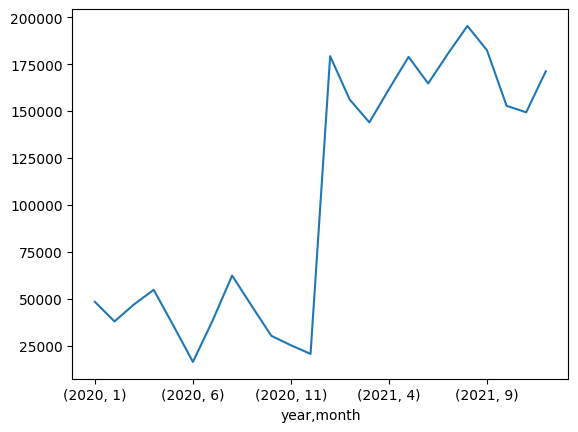

In [21]:
adidas.groupby(['year', 'month'])['Units Sold'].sum().plot()

In [22]:
adidas.groupby(['year','month'])['Units Sold'].sum()

year  month
2020  1         48333.0
      2         37846.0
      3         46972.0
      4         54709.0
      5         35705.0
      6         16269.0
      7         38219.0
      8         62307.0
      9         46125.0
      10        30167.0
      11        25152.0
      12        20545.0
2021  1        179299.0
      2        156113.0
      3        143988.0
      4        161717.0
      5        178900.0
      6        164745.0
      7        180481.0
      8        195414.0
      9        182425.0
      10       152834.0
      11       149350.0
      12       171246.0
Name: Units Sold, dtype: float64

In [23]:
adidas.pivot_table(index = 'year', columns = 'month', values = 'Units Sold', aggfunc = 'sum' )

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2020,48333.0,37846.0,46972.0,54709.0,35705.0,16269.0,38219.0,62307.0,46125.0,30167.0,25152.0,20545.0
2021,179299.0,156113.0,143988.0,161717.0,178900.0,164745.0,180481.0,195414.0,182425.0,152834.0,149350.0,171246.0


#### Analysis by Retails

In [24]:
adidas['Retailer'].unique()

array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

In [25]:
adidas.pivot_table(index = ['year', 'month'], columns = 'Retailer', values = 'Units Sold', aggfunc = 'sum')


Retailer     Amazon  Foot Locker   Kohl's  Sports Direct  Walmart  West Gear
year month                                                                  
2020 1          NaN      30275.0      NaN            NaN      NaN    18058.0
     2          NaN      14712.0      NaN            NaN      NaN    23134.0
     3          NaN      27650.0      NaN            NaN      NaN    19322.0
     4          NaN       2216.0      NaN            NaN  22146.0    30347.0
     5          NaN       2071.0      NaN         4584.0  10950.0    18100.0
     6          NaN          NaN      NaN            NaN      NaN    16269.0
     7          NaN          NaN      NaN        15198.0   1630.0    21391.0
     8          NaN      17796.0      NaN        10337.0  29676.0     4498.0
     9          NaN       5625.0      NaN         6203.0  19619.0    14678.0
     10         NaN       4446.0      NaN         9944.0  15777.0        NaN
     11         NaN       8193.0      NaN            NaN      NaN    16959.0
     12         NaN       7320.0   2214.0            NaN      NaN    11011.0
2021 1      13006.0      40384.0  29841.0        28070.0      NaN    67998.0
     2      14609.0      36526.0  32766.0        25159.0   1617.0    45436.0
     3      13204.0      31078.0  31904.0        38838.0   3409.0    25555.0
     4      12548.0      26734.0  37976.0        49526.0   6784.0    28149.0
     5      15489.0      35513.0  47726.0        38996.0   8007.0    33169.0
     6      17917.0      56632.0  15116.0        23859.0  10949.0    40272.0
     7      19510.0      59350.0  16403.0        27413.0  16342.0    41463.0
     8      18014.0      41453.0  15675.0        70385.0  17343.0    32544.0
     9      14879.0      24116.0  13671.0        90087.0  15359.0    24313.0
     10     17767.0      28945.0  12409.0        56195.0  13204.0    24314.0
     11     20456.0      43742.0  14765.0        30090.0   9090.0    31207.0
     12     20591.0      59592.0  16909.0        32756.0   4323.0    37075.0

<Axes: xlabel='month,year'>

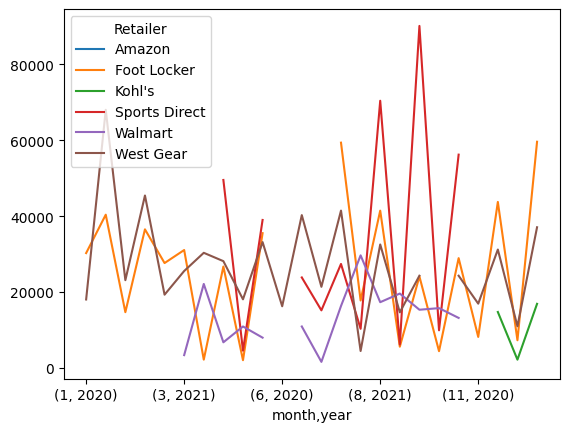

In [26]:
adidas.pivot_table (index= ['month', 'year'], columns = 'Retailer', values= 'Units Sold', aggfunc='sum' ).plot.line()

#### Count Retailer ID

In [27]:
adidas[['Retailer', 'Retailer ID']].drop_duplicates().sort_values('Retailer')

,Retailer,Retailer ID
1148,Amazon,1185732
2007,Foot Locker,1197831
1287,Foot Locker,1128299
0,Foot Locker,1185732
212,Kohl's,1189833
2147,Kohl's,1128299
1499,Kohl's,1185732
2786,Kohl's,1197831
766,Sports Direct,1185732
68,Sports Direct,1197831


#### Count Retailers by Month

In [28]:
df = adidas[['Retailer', 'Retailer ID', 'year', 'month']].drop_duplicates().sort_values(['Retailer', 'Retailer ID', 'year', 'month'])
df


,Retailer,Retailer ID,year,month
1224,Amazon,1185732,2021,1
1225,Amazon,1185732,2021,2
1231,Amazon,1185732,2021,3
1237,Amazon,1185732,2021,4
1243,Amazon,1185732,2021,5
...,...,...,...,...
2769,West Gear,1197831,2021,8
2775,West Gear,1197831,2021,9
2714,West Gear,1197831,2021,10
2715,West Gear,1197831,2021,11


In [29]:
df.pivot_table(index = ['year', 'month'], values = 'Retailer ID', aggfunc = 'count')



Retailer ID
year month             
2020 1                2
     2                2
     3                2
     4                4
     5                4
     6                1
     7                3
     8                5
     9                4
     10               3
     11               2
     12               3
2021 1               14
     2               15
     3               15
     4               15
     5               15
     6               13
     7               15
     8               16
     9               15
     10              16
     11              14
     12              13

<Axes: xlabel='year,month'>

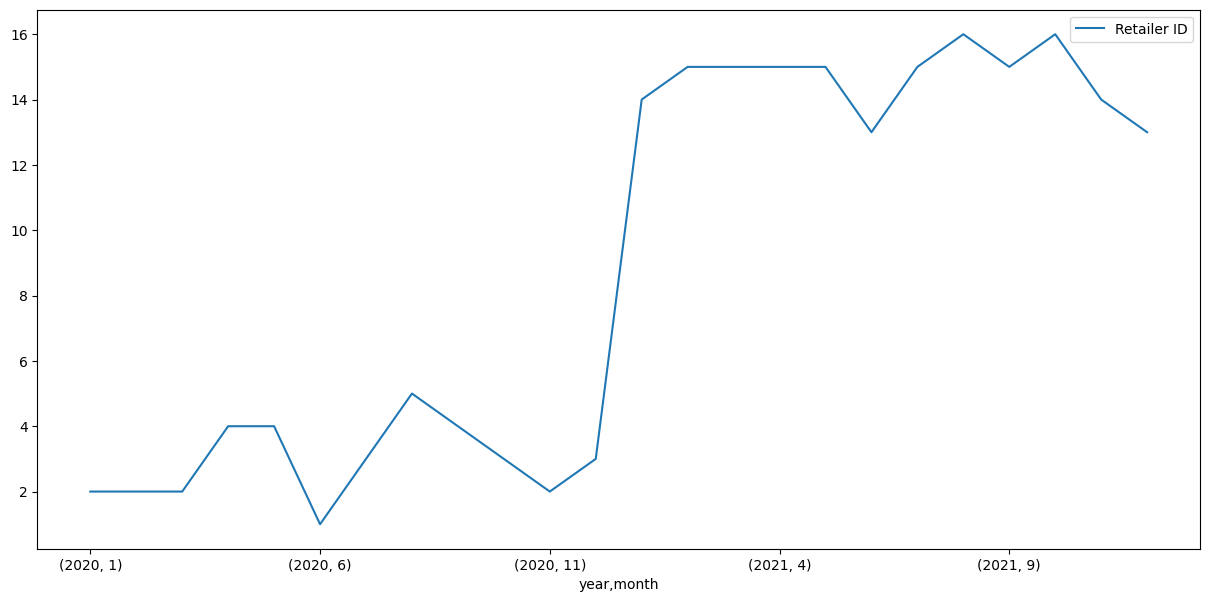

In [30]:
df.pivot_table(index= ['year', 'month'], values = 'Retailer ID', aggfunc= 'count').plot(kind= 'line', figsize = (15,7))


<Axes: xlabel='year,month'>

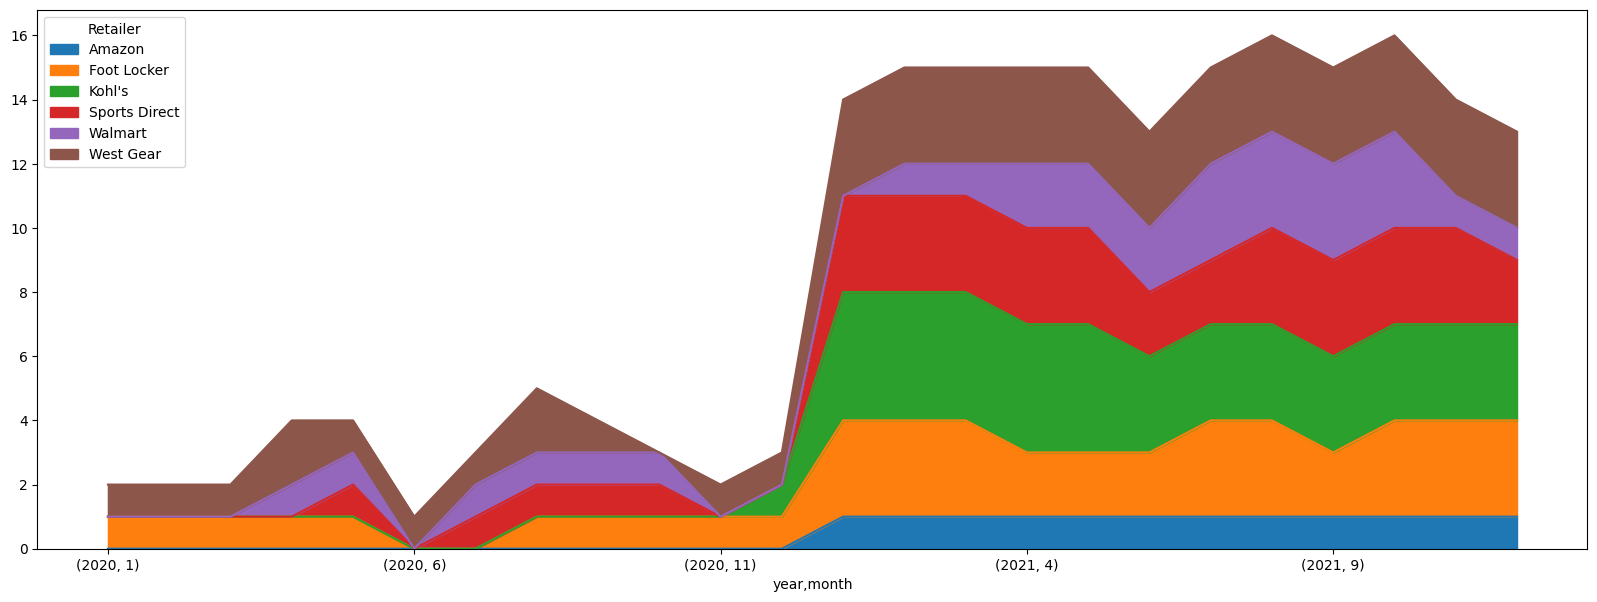

In [31]:
df.pivot_table(index = ['year', 'month'], columns = 'Retailer',values = 'Retailer ID', aggfunc = 'count').plot(kind = 'area', figsize = (20,7))

https://www.statista.com/statistics/268416/net-sales-of-the-adidas-group-worldwide-since-2000/



### Margin Rate Analysis

In [32]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Operating_Margin_rate,year,month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store,0.50,2020,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store,0.30,2020,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store,0.35,2020,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35.0,In-store,0.35,2020,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30.0,In-store,0.30,2020,1


In [33]:
# Operating margin by year
adidas.groupby('year').agg({'Operating Margin': 'mean', 'Units Sold' : 'sum'})

,Operating Margin,Units Sold
year,,
2020,40.373272,462349.0
2021,42.599569,2016512.0


In [34]:
# Operating margin rate by month
adidas.pivot_table(index = ['year', 'month'], values = 'Operating_Margin_rate', aggfunc= 'mean')

Operating_Margin_rate
year month                       
2020 1                   0.416467
     2                   0.404561
     3                   0.382443
     4                   0.435846
     5                   0.399158
     6                   0.323667
     7                   0.364615
     8                   0.426906
     9                   0.435625
     10                  0.423488
     11                  0.386095
     12                  0.401413
2021 1                   0.413291
     2                   0.412341
     3                   0.424218
     4                   0.429480
     5                   0.429269
     6                   0.423662
     7                   0.425791
     8                   0.432199
     9                   0.445357
     10                  0.434107
     11                  0.419101
     12                  0.420660

<Axes: xlabel='year,month'>

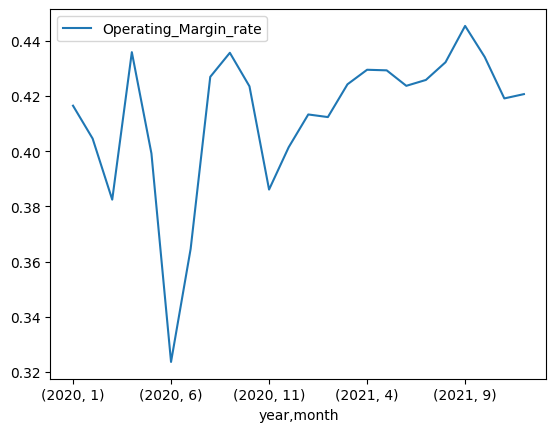

In [35]:
# visualize by line chart
adidas.pivot_table(index = ['year', 'month'], values = 'Operating_Margin_rate', aggfunc= 'mean').plot()

<Axes: xlabel='year,month'>

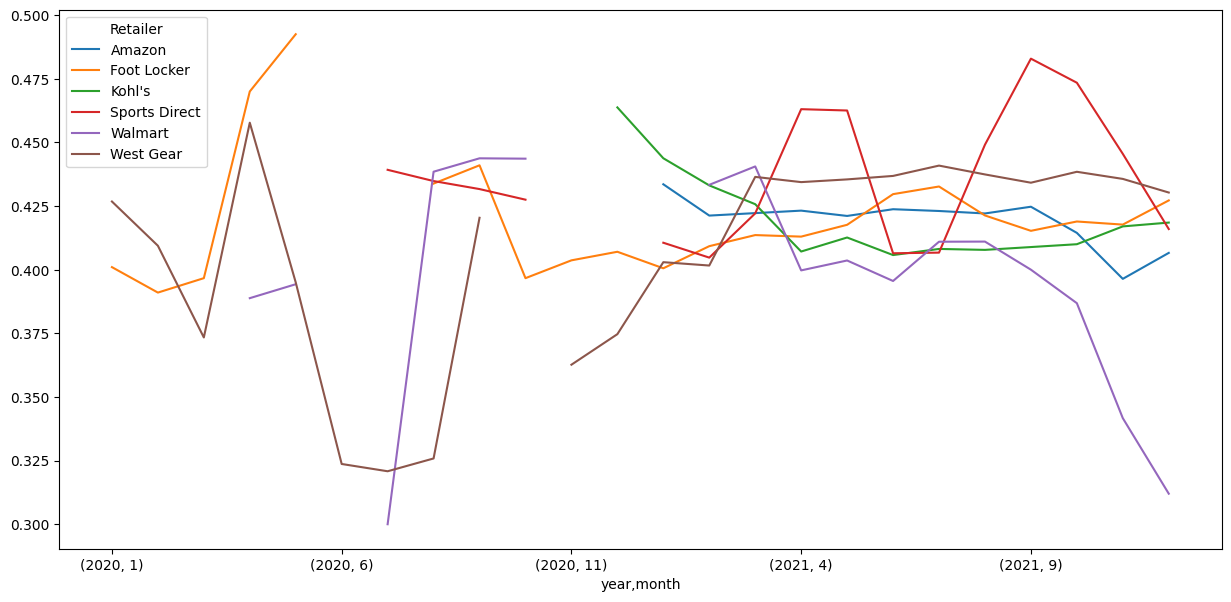

In [36]:
adidas.pivot_table(index = ['year', 'month'], columns = 'Retailer', values= 'Operating_Margin_rate', aggfunc = 'mean').plot(kind='line', figsize=(15,7))

### Margin Rate by Sales Method

In [37]:
#Operating margin rate by sales method
adidas.pivot_table(index = 'Sales Method', values = 'Operating_Margin_rate', aggfunc = 'mean')

,Operating_Margin_rate
Sales Method,
In-store,0.356121
Online,0.464152
Outlet,0.394876


In [38]:
#Yearly operationg margin rate by sales method
adidas.pivot_table(index = ['year'], columns = 'Sales Method', values = 'Operating_Margin_rate', aggfunc='mean')

Sales Method,In-store,Online,Outlet
year,,,
2020,0.331882,0.467245,0.376845
2021,0.360908,0.463776,0.398327


In [39]:
#Monthly operating margin rate by sales method
adidas.pivot_table(index= ['year', 'month'], columns = 'Sales Method', values = 'Operating_Margin_rate', aggfunc='mean')

Sales Method  In-store    Online    Outlet
year month                                
2020 1        0.364286  0.484400  0.383871
     2        0.335000  0.475526  0.381250
     3        0.314516  0.447917  0.362500
     4        0.394318  0.506724  0.354286
     5        0.340541  0.460227  0.362143
     6        0.258333  0.389000       NaN
     7        0.259677  0.416889  0.396786
     8        0.341304  0.488333  0.405161
     9        0.366667  0.498000  0.409375
     10       0.346000  0.485946  0.407917
     11       0.346667  0.450889  0.334444
     12            NaN  0.468780  0.347255
2021 1        0.364167  0.454987  0.368991
     2        0.364167  0.452704  0.366631
     3        0.364167  0.461051  0.395276
     4        0.364344  0.465850  0.407261
     5        0.362800  0.467658  0.405527
     6        0.358400  0.462705  0.389213
     7        0.359091  0.465598  0.389448
     8        0.358750  0.469049  0.411195
     9        0.358750  0.476703  0.440747
     10       0.358750  0.470535  0.414530
     11       0.358750  0.458981  0.384155
     12       0.358750  0.458832  0.390204

<Axes: xlabel='year,month'>

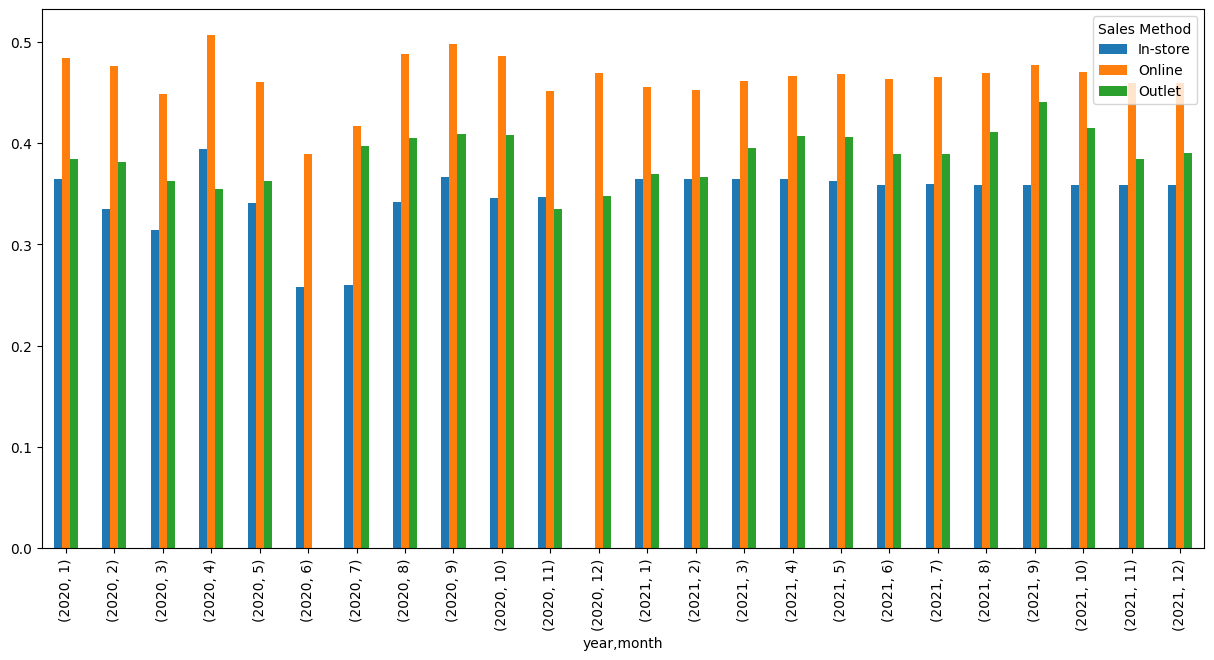

In [40]:
adidas.pivot_table(index= ['year', 'month'], columns = 'Sales Method', values = 'Operating_Margin_rate', aggfunc='mean').plot(kind='bar', figsize=(15,7))

In [41]:
#Monthly price per unit by sales method
adidas.pivot_table(index = ['year', 'month'], columns = 'Sales Method', values = 'Price per Unit', aggfunc = 'mean')

Sales Method   In-store     Online     Outlet
year month                                   
2020 1        49.285714  50.020000  45.505376
     2        66.250000  58.473684  49.464286
     3        53.387097  51.312500  46.865385
     4        62.613636  58.275862  51.178571
     5        62.702703  58.568182  53.714286
     6        66.333333  62.733333        NaN
     7        75.000000  59.622222  31.392857
     8        53.260870  43.000000  35.161290
     9        56.875000  49.750000  41.156250
     10       43.600000  42.621622  41.666667
     11       43.333333  43.822222  44.000000
     12             NaN  45.439024  48.294118
2021 1        36.666667  37.477212  40.348624
     2        36.375000  36.247887  37.529412
     3        36.958333  35.375000  34.407035
     4        39.303279  38.431755  37.630435
     5        48.400000  46.278237  41.586498
     6        50.680000  49.000000  44.617978
     7        55.619835  53.122283  47.149171
     8        51.958333  49.407609  38.862832
     9        43.250000  42.288828  39.419087
     10       49.541667  44.379679  41.897436
     11       52.958333  51.272727  46.763285
     12       58.833333  58.971510  51.178571

<Axes: xlabel='year,month'>

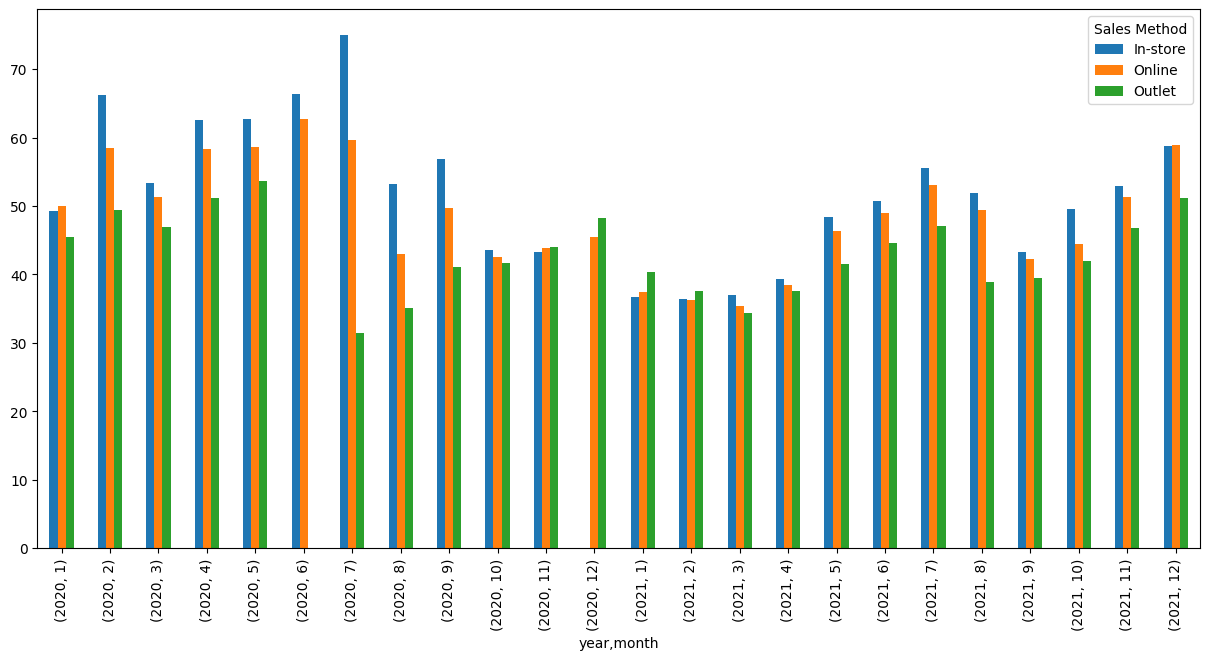

In [42]:

adidas.pivot_table(index = ['year', 'month'], columns = 'Sales Method', values = 'Price per Unit', aggfunc = 'mean' ).plot(kind='bar', figsize= (15,7))


### To analyze if sales method affects total profit
### Boxplotting

<Axes: title={'center': 'Price per Unit'}, xlabel='[Sales Method]'>

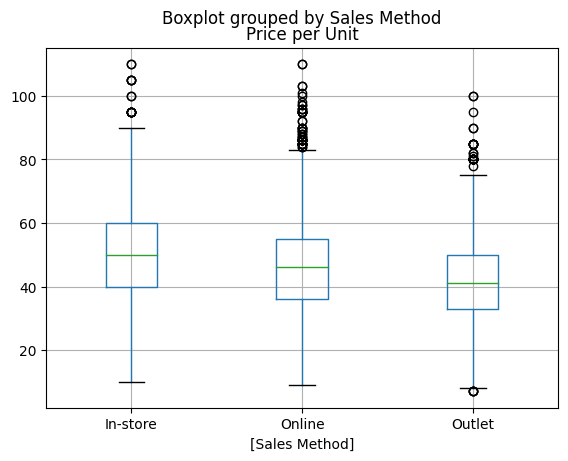

In [43]:
# Chart visualization using Boxplot; Price per unit
adidas[['Sales Method', 'Price per Unit']].boxplot(by = 'Sales Method')


<Axes: title={'center': 'Operating_Margin_rate'}, xlabel='[Sales Method]'>

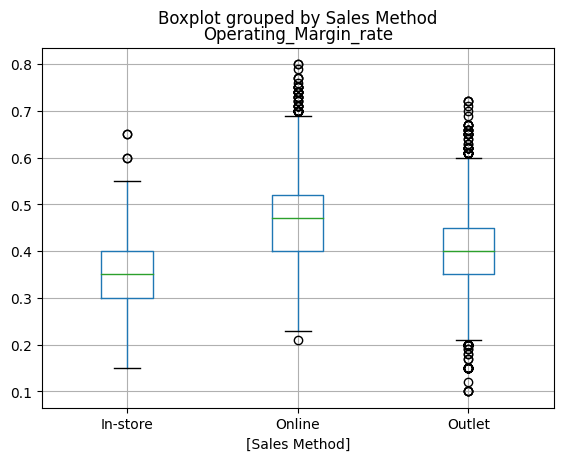

In [44]:
# Operating Margin Rate Boxplotting
adidas[['Sales Method', 'Operating_Margin_rate']].boxplot(by =  'Sales Method')

## Analysis using ANOVA method

In [45]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [56]:
# x variable: Sales Method (online, in-store, outlet)
# y variable: profit, price per unit, margin rate
def anova_analysis(x, y):
  df = adidas[[x, y]]

x = 'Sales Method'
y = 'Operating_Margin_rate'

In [57]:

df = adidas[[x,y]]
df

,Sales Method,Operating_Margin_rate
0,In-store,0.50
1,In-store,0.30
2,In-store,0.35
3,In-store,0.35
4,In-store,0.30
...,...,...
9643,Outlet,0.28
9644,Outlet,0.32
9645,Outlet,0.37
9646,Outlet,0.42


In [58]:
# remove white space for statsmodels ols function
# change ' ' to '_'
x = x.replace(' ', '_')
y = y.replace(' ', '_')
print('title : ', x , ':', y)

title :  Sales_Method : Operating_Margin_rate


In [59]:
df.columns

Index(['Sales Method', 'Operating_Margin_rate'], dtype='object')

In [60]:
df.columns = [x, y]
df.columns

Index(['Sales_Method', 'Operating_Margin_rate'], dtype='object')

In [61]:
# the "C" indicates categorical data
model = ols(f'{y} ~ C({x})', df).fit()

In [62]:
anova_tb = anova_lm(model)
print(anova_tb)

                     df     sum_sq   mean_sq            F  PR(>F)
C(Sales_Method)     2.0  18.450217  9.225109  1224.079115     0.0
Residual         9645.0  72.688254  0.007536          NaN     NaN


In [63]:
if anova_tb.iloc[0,4]<0.05: #[0,4] indicates PR(>F) values above
  print(f'There is {y} difference by sales method.')
else:
  print(f'There is no significant differrence in {y} by sales method.')

There is Operating_Margin_rate difference by sales method.


In [68]:
print('Verify Price per Unit Difference')
anova_analysis('Sales Method', 'Price per Unit')
print('\r\n\r\n')
print("======================================================")
print('\r\n\r\n')
print('Verify Operating Margin Rate Difference')
anova_analysis('Sales Method', 'Operating_Margin_rate')

Verify Price per Unit Difference






Verify Operating Margin Rate Difference
